#<a name='3'></a>
<div dir='rtl'>
<h1>2. مدل‌های بیزی (Bayesian Models)</h1>
</div>

<div dir='rtl'>
پیش‌تر با قضیه بیز آشنا شدید:
$$
P(B|A) = \frac{P(A|B)P(B)}{P(A)}
$$
فرض کنید قصد داریم بر حسب مشاهداتی، پیش‌آمدی را حدس بزنیم (پیشگویی کنیم).
با قرار دادن $A$ به عنوان متغیر تصادفی گویای مشاهدات و $B$ به عنوان متغیر تصادفی گویای آنچه قصد پیشگویی آن را داریم، به سادگی می‌توان از قضیه بیز برای این مقصود استفاده کرد.
به مدل‌های یادگیری ماشین که از منطق بالا بهره می‌برند، مدل‌های بیزی گفته می‌شود.
در این بخش قصد داریم مثال‌های ساده‌ای از مدل‌های بیزی را بررسی کنیم.
</div>

<div dir='rtl'>
ما معمولا احتمال واقعی ر‌‌و‌ید‌ا‌د‌ها را نمی‌دانیم. به همین دلیل، معمولا در مدل‌های بیزی، احتمالات مورد نیاز تخمین زده می‌شوند. این تخمین‌ها می‌توانند منطق‌های متفاوتی داشته باشند. در این بخش، ما از تخمین احتمالات به کمک تعریف بسامدی استفاده می‌کنیم. مسئله به این شکل بیان خواهد شد که ما مجموعه‌ای از مشاهدات قبلی به همراه نتایج حاصل از آن‌ها را داریم و با استفاده از آن‌ها به تخمین احتمالات می‌پردازیم. سپس با استفاده از این تخمین‌ها، مدل بیزی را می‌سازیم و از این پس،
با استفاده از این مدل، می‌توانیم به ازای مشاهدات جدید، نتایج پیش رو را حدس بزنیم.
</div>

<div dir='rtl'>
مثال) قصد داریم با بررسی میزان مشارکت دانشجویان درس ریاضیات گسسته ترم اخیر و نمره‌ی امتحان نهایی آن‌ها، ارتباط بین این دو مولفه را بررسی کنیم. میزان مشارکت به معنای تعداد سوالاتی است که به عنوان تمرین، در طول آن نیمساعت تحویل داده شده است. برای سادگی، این عدد بر بیشینه تعداد ممکن تقسیم شده است. نمره امتحان نهایی نیز از ۱۰۰ محاسبه شده است. در این مثال، قصد داریم با برازش مدل‌های بیزی متفاوت و بررسی عملکرد آن‌ها، بهینه مرز میزان مشارکتی را پیدا کنیم که بتوانیم با توجه به آن، قبولی دانشجو را حدس بزنیم (قبولی به معنای نمره‌ی بزرگ‌تر یا مساوی ۵۰ است).
</div>

In [ ]:
# `c()` function creates a list.
follow_rate = c(
  0.259, 0.944, 0.676, 0.148, 0.546, 0.556, 0.833, 0.87 , 0.713, 0.704, 0.019,
  0.833, 0.778, 0.667, 0.944, 0.0  , 0.796, 0.935, 0.222, 0.806, 0.704, 0.769,
  0.731, 0.602, 0.704, 0.398, 0.815, 0.528, 0.602, 0.713, 0.769, 0.935, 0.824,
  0.398, 0.898, 0.37 , 0.537, 0.944, 0.778, 0.407, 0.954, 0.87 , 0.491, 0.824,
  0.491, 0.713, 0.935, 0.38 , 0.037, 0.963, 0.63 , 0.574, 0.907, 0.0  , 0.63 ,
  0.796, 0.917, 0.481, 0.824, 0.972, 0.954, 0.861, 0.713, 0.315, 0.963, 0.935,
  0.324, 0.944, 0.778, 0.861, 0.509
)
final_grade = c(
  0.0  , 54.0 , 46.5 , 0.0  , 37.0 , 9.0  , 56.5 , 42.3 , 70.5 , 76.5 , 0.0  ,
  37.5 , 57.5 , 62.0 , 87.5 , 0.0  , 94.5 , 75.6 , 14.5 , 41.1 , 91.5 , 90.5 ,
  73.0 , 68.0 , 52.0 , 19.5 , 65.5 , 51.0 , 64.0 , 39.0 , 79.3 , 66.0 , 69.5 ,
  33.8 , 44.5 , 51.9 , 38.8 , 52.2 , 45.0 , 66.5 , 64.5 , 56.7 , 0.0  , 87.0 ,
  27.5 , 63.7 , 49.0 , 16.2 , 0.0  , 84.2 , 53.5 , 80.5 , 37.5 , 0.0  , 87.5 ,
  56.0 , 74.5 , 85.5 , 70.0 , 88.5 , 69.5 , 83.8 , 61.5 , 32.0 , 65.5 , 78.0 ,
  47.5 , 73.0 , 79.2 , 76.0 , 0.0
)
# Dataframe is similar to a table which gets columns as input.
history = data.frame(follow_rate, final_grade)
# `head()` function displays top 5 data entries of the input dataframe.
head(history)

,follow_rate,final_grade
,<dbl>,<dbl>
1,0.259,0.0
2,0.944,54.0
3,0.676,46.5
4,0.148,0.0
5,0.546,37.0
6,0.556,9.0


<div dir='rtl'>
ابتدا نیم‌نگاهی به نمایش تصویری دادگان داشته باشیم:
</div>

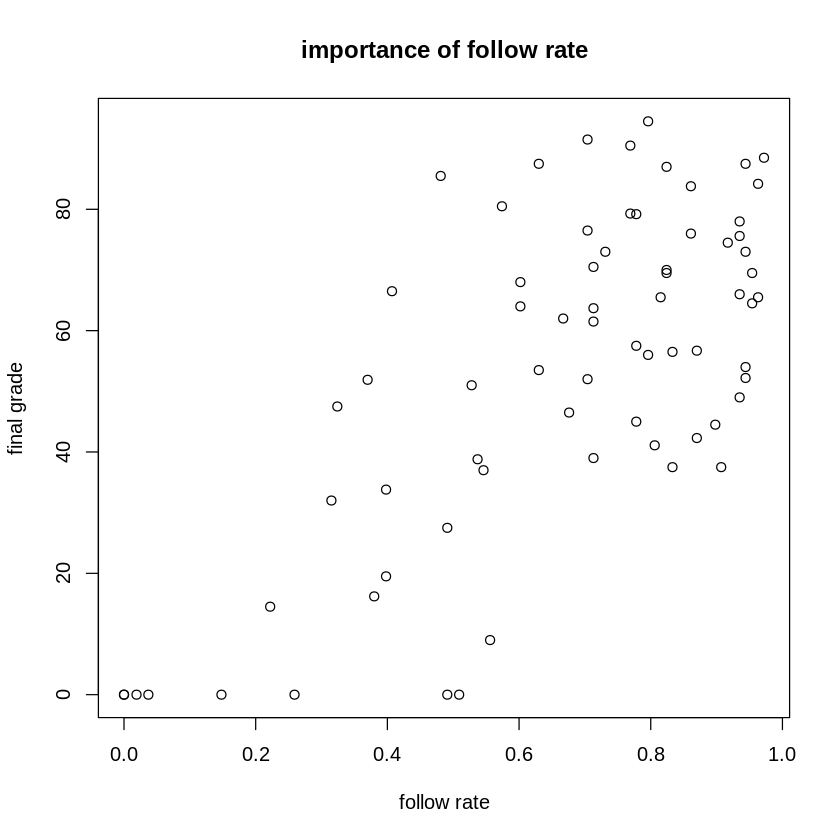

In [ ]:
plot(follow_rate, final_grade, main="importance of follow rate",
   xlab="follow rate", ylab="final grade")

# plot(x, y, main=<title>, xlab=<x axis label>, ylab=<y axis label>)

<div dir='rtl'>
ابتدا فرض کنید مرزی که به دنبال آن می‌گردیم مقدار ۰.۵ داشته باشد. نیاز است مدلی بیزی بر مبنای این مرز بنا کنیم. پس از ساخت مدل بیزی، سعی خواهیم کرد تا آن را به نحوی منعطف کنیم تا به ازای مرزهای متفاوت کار کند.
</div>

In [ ]:
threshold = 0.5

<div dir='rtl'>
در ستون نمرات نهایی، برای ما تنها مهم است که نمره قبولی دریافت شده یا خیر و نمره‌ی دقیق را نیاز نداریم. بنابراین میتوانیم این دادگان را به شکل باینری در بیاوریم.
همچنین در ستون میزان مشارکت، تنها مهم است میزان مشارکت از مرز موردنظر کوچک‌تر نباشد.
</div>

In [ ]:
binary_history = data.frame(follow_rate >= threshold, final_grade >= 50)
colnames(binary_history) <- c("followed","passed")
# `colnames(binary_history) <- c("followed","passed")` sets column names 
head(binary_history)

,followed,passed
,<lgl>,<lgl>
1,FALSE,FALSE
2,TRUE,TRUE
3,TRUE,FALSE
4,FALSE,FALSE
5,TRUE,FALSE
6,TRUE,FALSE


<div dir='rtl'>
حال به محاسبه احتمالات مورد نیاز برای مدل بیزی می‌پردازیم. برای این امر، از تعریف کلاسیک احتمال بر روی مشاهدات
$binary_history$
استفاده می‌کنیم.
</div>

In [ ]:
# `dataframe$x` addresses the column = x of dataframe.
P_followed = sum(binary_history$followed) / length(binary_history$followed)
P_passed = sum(binary_history$passed) / length(binary_history$passed)

P_followed_if_passed = 
  sum(binary_history[binary_history$passed == 1, ]$followed) / 
  sum(binary_history$passed)
# Note: binary_history[binary_history$rainy==1,] makes a subset of
# binary_history which have rainy=1

P_followed_if_not_passed = 
  sum(binary_history[binary_history$passed == 0, ]$followed) / 
  length(binary_history[binary_history$passed == 0, ]$followed)

In [ ]:
# Based on Bayes' theorem theorem:
P_passed_if_followed = P_followed_if_passed * P_passed / P_followed
P_not_passed_if_followed = P_followed_if_not_passed * (1-P_passed) / P_followed
P_passed_if_not_followed = (1-P_followed_if_passed) * P_passed / (1-P_followed)
P_not_passed_if_not_followed = (1-P_followed_if_not_passed)*(1-P_passed) / 
                                (1-P_followed)

<div dir='rtl'>
پس اگر شخصی بیشتر از 50 درصد در درس فعالیت داشته باشد،
طبق نتایج زیر می‌توانیم پیش‌گویی قبولی را برای او داشته باشیم:
</div>

In [ ]:
# cat is a function to make strings
cat("If we have a following student:\n")
cat("Probability of passing:", P_passed_if_followed, "\n")
cat("Probability of failing:", P_not_passed_if_followed, "\n")

If we have a following student:
Probability of passing: 0.7592593 
Probability of failing: 0.2407407 


<div dir='rtl'>
همچنین اگر دانشجویی مشارکت کمتر از 50 درصد داشته باشد،
طبق نتایج زیر می‌توانیم پیش‌گویی عدم قبولی داشته باشیم:
</div>

In [ ]:
cat("If we have a not following student:\n")
cat("Probability of passing:", P_passed_if_not_followed, "\n")
cat("Probability of no passing:", P_not_passed_if_not_followed, "\n")

If we have a not following student:
Probability of passing: 0.1764706 
Probability of no passing: 0.8235294 


<div dir='rtl'>
در ادامه سعی بر آن خواهیم داشت تا تابعی برای انجام محاسبات بالا آماده کنیم.
</div>

In [ ]:
# Inputs:
#    observations: a data.frame such as history containing two columns:
#                 1. column y: what we want to predict in future.
#                 2. column x: what we want to predict based on.
#    x: name of column x in observations
#    y: name of column y in observations
#    situation: x value of new situation that we want to predict the
#              corresponding y
# 
# The function assumes that x and y are just 0 or 1.
# 
# Output of function determines that the corresponding y for the input
# situation, whether it is equal to 1 or not.

# `nrow()` function returns number of rows in the input dataframe.
bayes_prediction = function(situation, observations, x, y) {
  P_x = sum(observations[x]) / nrow(history)
  P_y = sum(observations[y]) / nrow(history)
  P_x_if_y = sum(observations[observations[y] == 1, ][x]) /
             sum(observations[y])
  P_x_if_not_y = sum(observations[observations[y] == 0, ][x]) /
                 nrow(observations[observations[y] == 0, ])
  if (situation == 1) {
    P_true = P_x_if_y * P_y / P_x
    P_false = P_x_if_not_y * (1-P_y) / P_x
    return (P_true > P_false)
  } else {
    P_true = (1-P_x_if_y) * P_y / (1-P_x)
    P_false = (1-P_x_if_not_y) * (1-P_y) / (1-P_x)
    return (P_true > P_false)
  }
}

bayes_prediction(1, binary_history, x = "followed", y = "passed")
bayes_prediction(0, binary_history, x = "followed", y = "passed")

[1] TRUE

[1] FALSE

<div dir='rtl'>
اگر بیشتر به نحوه‌ی عملکرد مدل‌های بیزی دقت کنیم، می‌بینیم که پیشگویی‌های این مدل‌ها بر مبنای مقایسه‌ی احتمال حالات در شرایطی خاص است؛ به نحوی که برای هر پیشگویی، با استفاده از قضیه‌ی بیز، به ازای هر پاسخ ممکن یک احتمال محاسبه شده و پاسخ دارای احتمال بیشینه به عنوان پیشگویی درنظر گرفته خواهد شد.
بنابراین در هر پیشگویی، مخرج کسر در رابطه‌ی بیز، در محاسبه‌ی تمام احتمالات یکسان است (با توجه به اینکه برای یک مشاهده‌ی خاص قصد پیشگویی داریم، عامل مربوط به آن پیش‌آمد خاص در تمام حالات ممکن یکسان است). درنتیجه، چون تنها مقایسه‌ی این مقادیر برای ما با اهمیت است،
به سادگی می‌توان این مقدار را نادیده گرفت و در محاسبات وارد نکرد.
</div>

In [ ]:
bayes_prediction = function(situation, observations, x, y) {
  P_y = sum(observations[y]) / nrow(history)
  P_x_if_y = sum(observations[observations[y] == 1, ][x]) /
             sum(observations[y])
  P_x_if_not_y = sum(observations[observations[y] == 0, ][x]) /
                 nrow(observations[observations[y] == 0, ])
  if (situation == 1) {
    P_true = P_x_if_y * P_y
    P_false = P_x_if_not_y * (1-P_y)
    return (P_true > P_false)
  } else {
    P_true = (1-P_x_if_y) * P_y
    P_false = (1-P_x_if_not_y) * (1-P_y)
    return (P_true > P_false)
  }
}

bayes_prediction(1, binary_history, x = "followed", y = "passed")
bayes_prediction(0, binary_history, x = "followed", y = "passed")

[1] TRUE

[1] FALSE

<div dir='rtl'>
به مسائلی همچون مسائل بالا که با داشتن اطلاعاتی، قصد داریم مابین چند گزینه روی میز، یکی را برگزینیم، مسائل طبقه‌بندی یا classifying گفته می‌شود.
به مدل‌هایی مانند مدل بالا که این مسائل را حل می‌کنند، مدل‌های طبقه‌بند یا classifier
می‌گویند. به هر یک از پاسخ‌های ممکن در این مسائل، یک طبقه یا class گفته می‌شود.
مسئله بالا دارای دو طبقه قبولی یا ردی دانشجو در امتحان نهایی بود.
مسائل طبقه‌بندی می‌توانند دارای تعداد بیشتری طبقه باشند. توسعه مدل بالا برای پیشگویی بین طبقات بیشتر کار ساده‌است. کافیست تعداد احتمالات بیشتری را با کمک قضیه‌ی بیز محاسبه کنیم.
بد نیست اگر در مسئله بالا، نمره نهایی را به سه بازه تقسیم کنید و با دست بردن در صورت سوال، مسئله و پاسخش را برای این حالت نیز گسترش دهید.
</div>

<div dir='rtl'>
به متغیر‌های تصادفی مانند میزان مشارکت در مسئله اخیر، که برای پیشگویی مورد استفاده قرار می‌گیرند، متغیر‌های پیشگو، کمکی، predictor یا feature گفته می‌شود. مسئله بالا دارای تنها یک متغیر پیشگو بود اما تعداد این متغیر‌ها می‌تواند بسیار زیاد‌تر باشد.
همچنین در مسئله بالا، متغیر پیشگو را باینری درنظر گرفتیم.
اما این متغیر می‌تواند تنوع مقادیر بیشتری داشته باشد یا حتی
دارای مقادیر پیوسته باشد که این شرایط را در آینده بررسی خواهیم کرد.
</div>

<div dir='rtl'>
حال به حل مسئله اصلی، یعنی پیدا کردن کمینه میزان مشارکت که مدل بیز به ازای آن پیشگویی قبولی می‌کند می‌پردازیم. برای این امر، ابتدا تابعی آماده می‌کنیم تا با دریافت مرز میزان مشارکت، دادگان میزان مشارکت را باینری کند.
</div>

In [ ]:
history_to_binary = function(history, threshold) {
    binary_history = data.frame(
      history$follow_rate >= threshold,
      history$final_grade >= 50
    )
    colnames(binary_history) <- c("followed","passed")
    return (binary_history)
}

head(history_to_binary(history, 0.3))

,followed,passed
,<lgl>,<lgl>
1,FALSE,FALSE
2,TRUE,TRUE
3,TRUE,FALSE
4,FALSE,FALSE
5,TRUE,FALSE
6,TRUE,FALSE


<div dir='rtl'>
بنابراین می‌توانیم با کنار هم قرار دادن دو تابع بالا، پیشگویی‌هایی با مرز‌های مختلف داشته باشیم:
</div>

In [ ]:
cat("If someone has less than 70% contribution, they probably will pass:",
  bayes_prediction(
    0, history_to_binary(history, 0.7),
    x = "followed", y = "passed"
  )
)

cat("\nIf someone has less than 80% contribution, they probably will pass:",
  bayes_prediction(
    0, history_to_binary(history, 0.8),
    x = "followed", y = "passed"
  )
)

If someone has less than 70% contribution, they probably will pass: FALSE
If someone has less than 80% contribution, they probably will pass: TRUE

<div dir='rtl'>
حال لازم است مرزی را پیدا کنیم که پیشگویی‌های به وسیله آن، بیشترین مطابقت را با مشاهدات فعلی‌مان داشته باشد. برای این کار نیاز به تابعی داریم که میزان این تطابق را محاسبه کند:
</div>

In [ ]:
accuracy = function(binary_history) {
    matchs_no = 0
    # Loop over dataframe:
    for (row in 1:nrow(binary_history)) { 
        followed = binary_history[row, "followed"]
        passed = binary_history[row, "passed"]

        prediction = bayes_prediction(
          followed, binary_history, x = "followed", y = "passed"
        )
        matchs_no = matchs_no + (prediction == passed)
    }
    return (matchs_no/nrow(binary_history))
}

cat("accuracy of threshold = 0.5 is", accuracy(history_to_binary(history, 0.5)))

accuracy of threshold = 0.5 is 0.7746479

<div dir='rtl'>
حال با اجرای یک حلقه تکرار بر روی مقادیر مختلف مرز مشارکت، بهینه مرز مشارکتی را پیدا می‌کنیم که پیشگویی بر مبنای آن بیشترین تطابق را با دادگان ما خواهد داشت. میزان دقت این جستجو را 0.01 قرار خواهیم داد.
</div>

In [ ]:
best_accuracy = -1
best_threshold = -1

for (thr in 0:100) {
  threshold = 0.01 * thr
  acc = accuracy(history_to_binary(history, threshold))
  if (acc > best_accuracy) {
    best_accuracy = acc
    best_threshold = threshold
  }
}

cat(
  "The best accuracy is", best_accuracy,
  "corresponding to the threshold", best_threshold
)

The best accuracy is 0.8169014 corresponding to the threshold 0.56